## Распределение uniform

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def draw_hist(data):

    data['Index'] = range(len(data))

    print(data)

    hist_data = data['Values'].value_counts().reset_index()
    print(hist_data)

    plt.figure(figsize=(10, 6))
    plt.bar(hist_data['Values'], hist_data['count'], color='skyblue', edgecolor='black')
    plt.xlabel('Число зарегестрированных фотонов', fontsize=12)
    plt.ylabel('Число событий', fontsize=12)
    plt.title('Гистограмма распределения', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

## Для позитронов

      Values  Index
0       1192      0
1        864      1
2        911      2
3       1407      3
4       1234      4
...      ...    ...
9995    1611   9995
9996    1272   9996
9997    1104   9997
9998    1321   9998
9999     676   9999

[10000 rows x 2 columns]
      Values  count
0       1265     29
1       1257     29
2       1239     28
3       1229     28
4       1387     28
...      ...    ...
1046     586      1
1047     732      1
1048     711      1
1049     761      1
1050     676      1

[1051 rows x 2 columns]


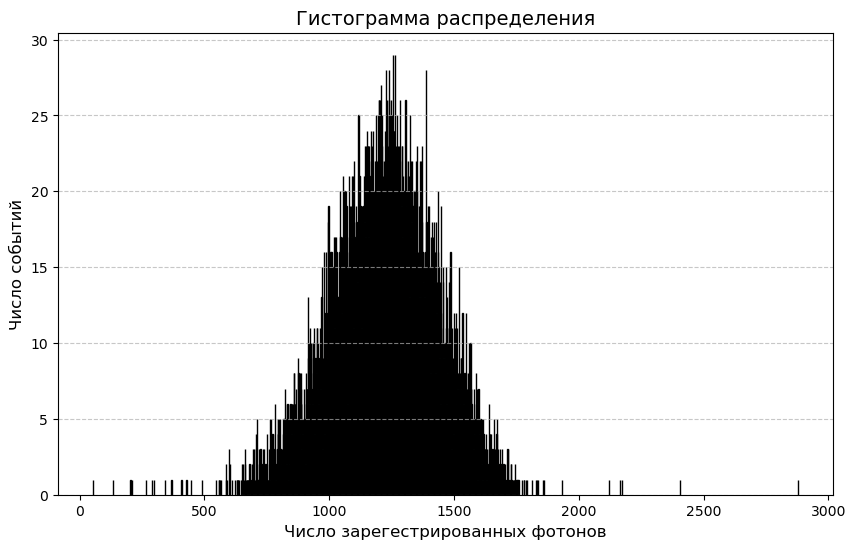

In [22]:
data_positrons = pd.read_csv('/Users/semenraydun/Desktop/GEANT4/examples/basic/B1/build/Uniforms(10Kpositrons).csv', header=None, names=['Values'])
draw_hist(data_positrons)

## Для электронов

      Values  Index
0        315      0
1        256      1
2        234      2
3        291      3
4        198      4
...      ...    ...
9995     276   9995
9996     292   9996
9997     260   9997
9998     174   9998
9999     310   9999

[10000 rows x 2 columns]
     Values  count
0       260     96
1       280     95
2       268     95
3       271     94
4       263     93
..      ...    ...
301     395      1
302     415      1
303     400      1
304     127      1
305     402      1

[306 rows x 2 columns]


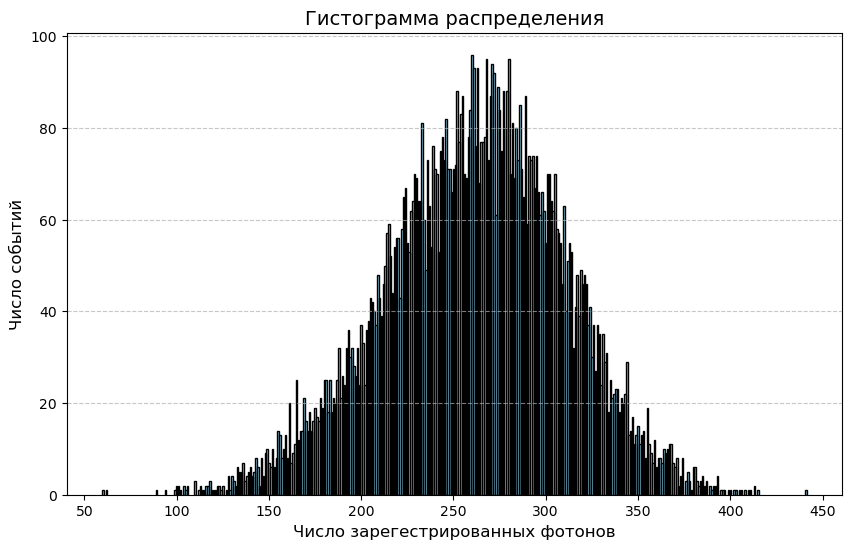

In [23]:
data_electrons = pd.read_csv('/Users/semenraydun/Desktop/GEANT4/examples/basic/B1/build/Uniforms(10Kelectrons).csv', header=None, names=['Values'])
draw_hist(data_electrons)

## Распределение по координатам

In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def read_csv_files_from_folder(folder_path):

    data = {}
    
    all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    for file in all_files:

        coord = float(file.split('_')[-1].replace('.csv', ''))

        df = pd.read_csv(os.path.join(folder_path, file), skiprows=5, header=None)

        data[coord] = df[0]

    combined_df = pd.DataFrame(data)

    combined_df = combined_df[sorted(combined_df.columns)]
    
    return combined_df

def plot_mean_vs_coordinates(df):

    coordinates = [-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 
                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    df = df[[col for col in df.columns if float(col) in coordinates]]

    means = df.mean(axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(coordinates, means, marker='o', linestyle='-', color='b')
    plt.title("Среднее значение от координат")
    plt.xlabel("Координаты")
    plt.ylabel("Среднее значение")
    plt.grid(True)
    plt.ylim(1150, 1350)
    plt.show()

## Распределение для электронов

### x

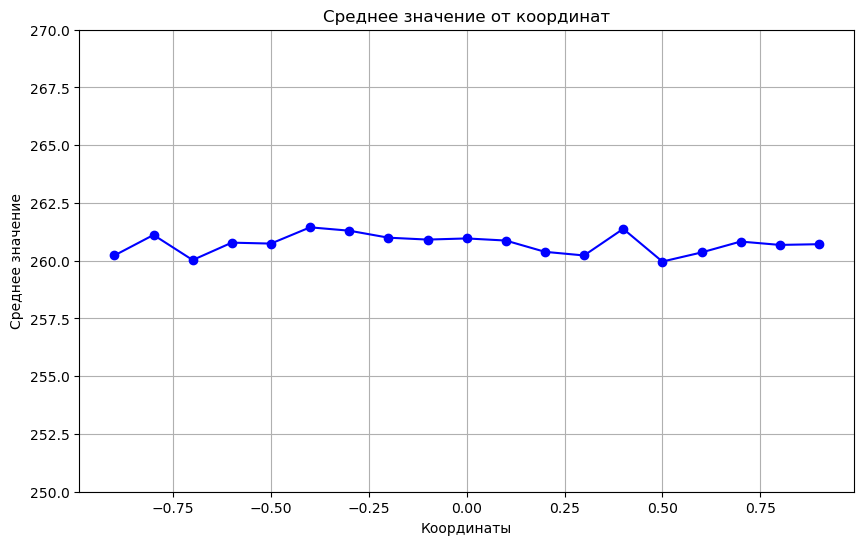

In [29]:
folder_path = "/Users/semenraydun/Desktop/GEANT4/examples/basic/B1/build/electronX"
elec_x = read_csv_files_from_folder(folder_path)
elec_x
plot_mean_vs_coordinates(elec_x)

### y

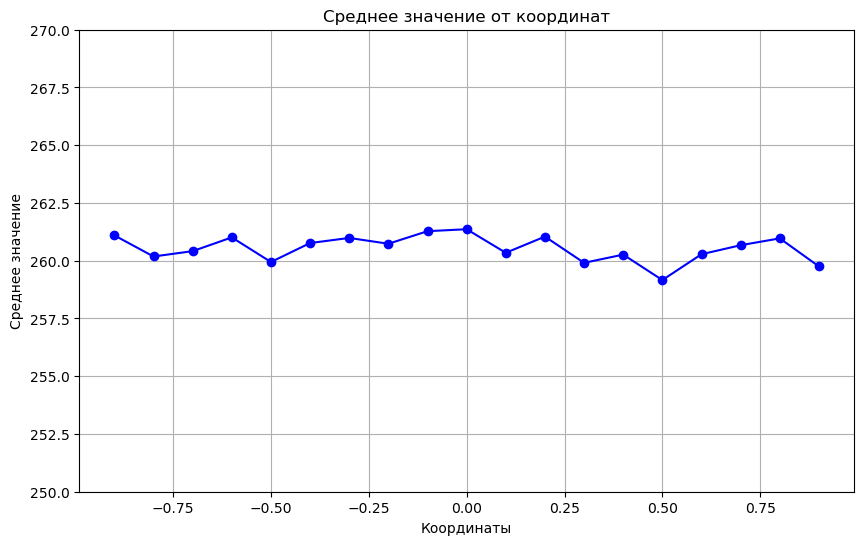

In [30]:
folder_path = "/Users/semenraydun/Desktop/GEANT4/examples/basic/B1/build/electronY"
elec_y = read_csv_files_from_folder(folder_path)
elec_y
plot_mean_vs_coordinates(elec_y)

### z

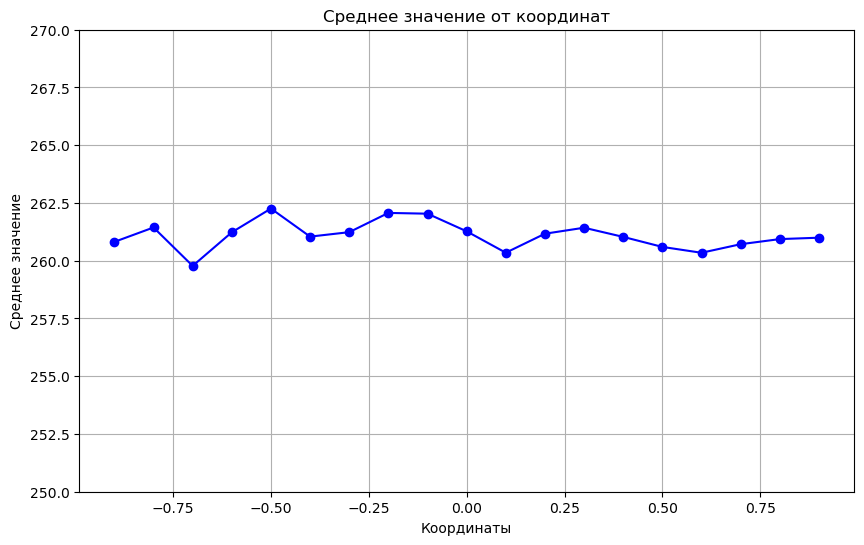

In [31]:
folder_path = "/Users/semenraydun/Desktop/GEANT4/examples/basic/B1/build/electronZ"
elec_z = read_csv_files_from_folder(folder_path)
elec_z
plot_mean_vs_coordinates(elec_z)

## Позитроны

### x

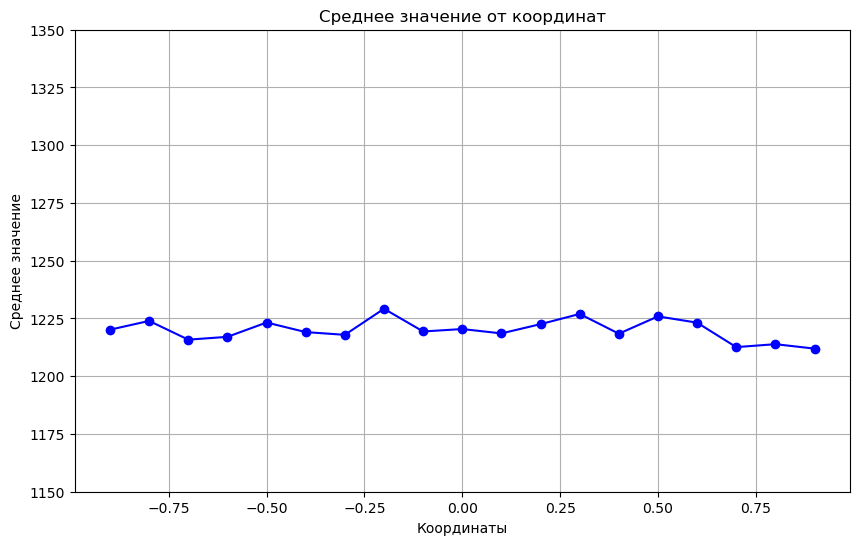

In [36]:
folder_path = "/Users/semenraydun/Desktop/GEANT4/examples/basic/B1/build/positronX"
positr_x = read_csv_files_from_folder(folder_path)
positr_x
plot_mean_vs_coordinates(positr_x)

### y

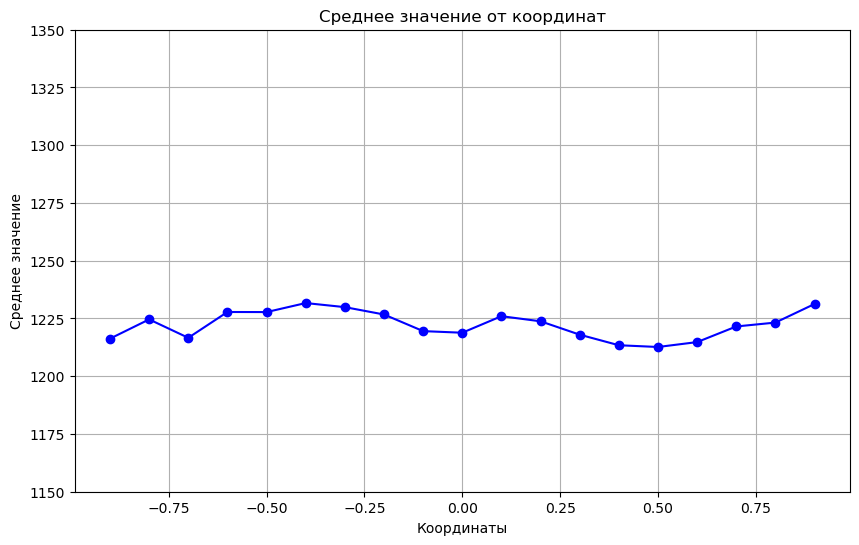

In [37]:
folder_path = "/Users/semenraydun/Desktop/GEANT4/examples/basic/B1/build/positronY"
positr_y = read_csv_files_from_folder(folder_path)
positr_y
plot_mean_vs_coordinates(positr_y)

### z

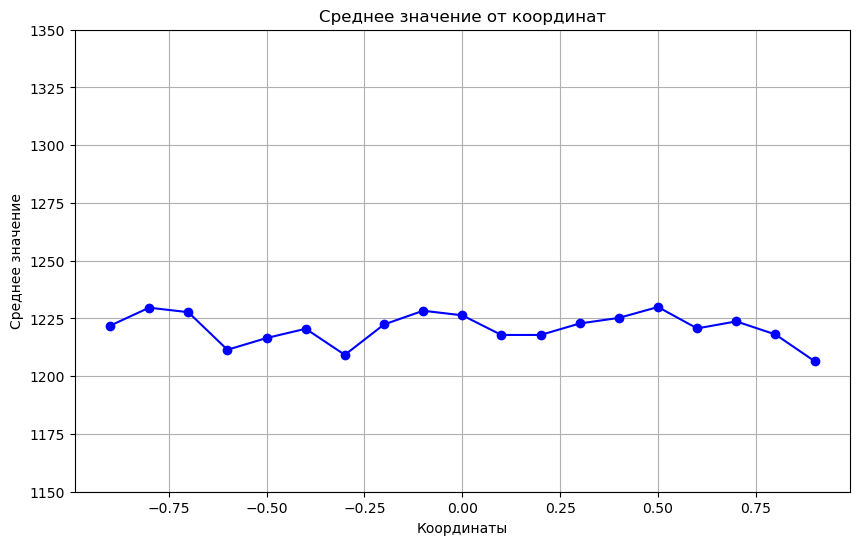

In [39]:
folder_path = "/Users/semenraydun/Desktop/GEANT4/examples/basic/B1/build/positronZ"
positr_z = read_csv_files_from_folder(folder_path)
positr_z
plot_mean_vs_coordinates(positr_z)